# <div align="center">奇异值分解<br/>singular value decomposition<br/>SVD</div>
<br/><br/><br/><br/>
<br/><br/><br/><br/>

#### <div style="position:absolute;right:0px;bottom:0px;">林伯威</div>

In [1]:
from IPython.display import Latex, Image as IImage
import numpy as np
from numpy import array
from PIL import Image
import time
import matplotlib.pyplot as plt
import numpy.matlib as mlb
from numpy import matrix, linalg
from numpy import random
import pandas as pd

#### 矩阵格式化

In [2]:
##  <div align="center">SVD的数学基础</div>

####  <div align="center">《大数据分析》P48-49</div>om IPython.display import display,Latex,Math
  
from IPython.core.interactiveshell import InteractiveShell
sh = InteractiveShell.instance()
  
def number_to_str(n,cut=5):
    ns=str(n)
    format_='{0:.'+str(cut)+'f}'
    if 'e' in ns or ('.' in ns and len(ns)>cut+1):
        return format_.format(n)
    else: return str(n)

def matrix_to_latex(mat,style='bmatrix'):
    if type(mat)==np.matrixlib.defmatrix.matrix: mat=mat.A
    head=r'\begin{'+style+'}'
    tail=r'\end{'+style+'}'
    if len(mat.shape)==1:
        body=r'\\'.join([str(el) for el in mat])
        return head+body+tail
    elif len(mat.shape)==2:
        lines=[]
        for row in mat:
            lines.append('&'.join([number_to_str(el) for el in row])+r'\\')
        s=head+' '.join(lines)+tail
        return s
    return None
  
sh.display_formatter.formatters['text/latex'].type_printers[np.ndarray]=matrix_to_latex

##  <div align="center">SVD的数学基础</div>

####  <div align="center">《大数据分析》P48-49</div>

### 定理3.1.1（矩阵对角化定理）

实方阵$S_{m\times m}$有m个线性无关的特征向量，则存在特征分解$S=U\Lambda U^{-1}$，其中$U=(\vec{u_1},\vec{u_2},...,\vec{u_m})$，$\Lambda=diag(\lambda_1,\lambda_2,...,\lambda_m)$，$\vec{u_i}$为S的特征向量，$\lambda_i$为$S$的特征值，$\lambda_i \ge \lambda_{i+1}$。

$$S\vec{u_i}=\lambda_i\vec{u_i}$$
$$SU=S(\vec{u_1},\vec{u_2},...,\vec{u_m})=(\lambda_2\vec{u_1},\lambda_2\vec{u_2},...,\lambda_m\vec{u_m})=(\vec{u_1},\vec{u_2},...,\vec{u_m})diag(\lambda_1,\lambda_2,...,\lambda_m)$$
$$SU=U\Lambda$$

### 定理3.1.2（对称对角化定理）

实对称方阵$S_{m\times m}$有m个线性无关的特征向量，则存在对称对角化分解$S=Q\Lambda Q^{-1}$，其中$Q$的每列都是互相正交且归一的特征向量，$Q^{-1}=Q^T$。

### 定理3.1.3

矩阵$C_{m\times n}$的秩为$r$，则存在奇异值分解$C=U_{m\times r}\Sigma_{r\times r} {V^T} _{r\times n}$，且

(1)$CC^T$的特征值$(\lambda_1,\lambda_2,...,\lambda_r)$等于$C^TC$的特征值；

(2)左奇异矩阵$U$是$CC^T$的特征向量的矩阵，右奇异矩阵$V$是$C^TC$的特征向量的矩阵，特征向量均为互相正交且归一的；

(3)$\Sigma=diag(\sigma_1,\sigma_2,...,\sigma_r)$，$\sigma_i=\sqrt{\lambda_i}$为奇异值，$\sigma_i \ge \sigma_{i+1}$。

<br/><br/>

$$C=\sum_{i=1}^r\sigma_iu_iv_i^T$$
$$C=U_{m\times m}\Sigma_{m\times n} {V^T} _{n\times n}$$

##  <div align="center">特征值与奇异值</div>

（对复数矩阵不了解，故都在实数矩阵范围内讨论）

<b>·</b>任意矩阵都有奇异值，但只有方阵有特征值。

<b>·</b>奇异值都是非负的，特征值可正可负可零。

<b>·</b>奇异值和特征值相等的矩阵是半正定矩阵。（https://www.zhihu.com/question/358795709）

<b>·</b>矩阵的奇异值与特征值有什么相似之处与区别之处？https://www.zhihu.com/question/19666954

In [3]:
def draw (xs, ys, xlim = None, ylim = None):
    figsize = (10,)*2
    marker = 'x'
    pointSize = 10
    
    ax = pd.DataFrame({'x':xs,'y':ys}).plot.scatter(x='x', y='y', s=pointSize, marker=marker, figsize=figsize,xlim=xlim,ylim=ylim);
    #ax.set_xlabel('x',fontdict={'FontSize':fontSize})
    #ax.set_ylabel('y',fontdict={'FontSize':fontSize})
    return ax

In [4]:
def sig2str (s):
    return ','.join(['%.5f' % x for x in s])

<b>·</b> 矩阵的左奇异向量依次是样本方差最大的方向，奇异值的平方是对应方向的方差乘样本数量。

（$u_1$是方差最大的方向，$u_2$是正交与$u_1$的方差最大的方向，……）

In [5]:
EX, EY = 0, 0
DX, DY = 3,2###其实是标准差
n = 10000
C = np.array([random.normal(EX, DX, n), random.normal(EY, DY, n)])
np.std(C[0]),np.std(C[1])

(3.018430277638197, 1.9947047363191868)

In [6]:
U, SIG, V = linalg.svd(matrix(C))
U_ = 1/n * U * matrix(np.diag(SIG * SIG))

In [7]:
laU = Latex('$$U=%s$$' % matrix_to_latex(U))
laSIG = Latex('$$\Sigma=diag(%s)$$' % sig2str(SIG))
laU_ = Latex('$$U\_=%s$$' % matrix_to_latex(U_))

{{laU}}

{{laSIG}}

{{laU_}}

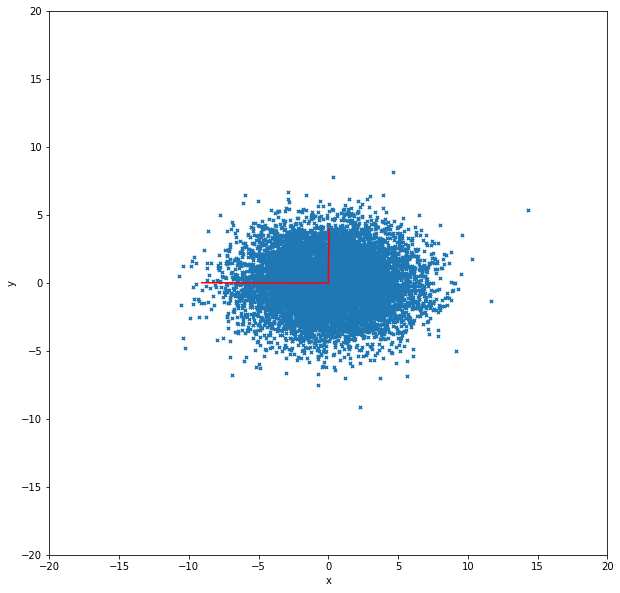

In [138]:
lim = 20
ax = draw(C[0],C[1],(-lim,lim),(-lim,lim));
ax.plot([0,U_[0,0]],[0,U_[0,1]], color='r')
ax.plot([0,U_[1,0]],[0,U_[1,1]], color='r');

{{display(ax.figure)}}

##  <div align="center">python的svd</div>

### numpy.linalg

返回$U$和$V^T$为方阵，$\Sigma$为长度$min\{m,n\}$的向量

In [155]:
from numpy import matrix, linalg
C = matrix([[2,4,0],[1,3,0],[0,0,0],[0,0,0]])
U, SIG, VT = linalg.svd(C)

In [156]:
laC = Latex('$$C=%s$$' % matrix_to_latex(C))
laU = Latex('$$U=%s$$' % matrix_to_latex(U))
laSIG = Latex('$$\Sigma=diag(%s)$$' % sig2str(SIG))
laVT = Latex('$$V^T=%s$$' % matrix_to_latex(VT))

{{laC}}

### numpy.linalg

返回$U$和$V^T$为方阵，$\Sigma$为长度$min\{m,n\}$的向量

{{laU}}

{{laSIG}}

{{laVT}}

In [159]:
tSig = mlb.zeros((len(U), len(VT)))
for i, x in enumerate(SIG):
    tSig[i,i] = x

U*tSig*VT == C, U[:,:2] * tSig[:2,:2] * VT[:2,] == C

(matrix([[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]),
 matrix([[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]))

### scipy.sparse.linalg

稀疏矩阵svd

需要输入保留的奇异值个数$k\in[1,min(A.shape))$，默认6

###### if k <= 0 or k >= min(n, m): raise ValueError()

返回$U$和$V^T$不为方阵，$\Sigma$为长度k的向量，$U$、$V^T$和$\Sigma$均为倒序

In [95]:
import scipy.sparse.linalg as linalg
import scipy.sparse as sparse
C = sparse.coo_matrix(([2,4,1,3],[[0,0,1,1],[0,1,0,1]]), (4,3), dtype=float)
U,SIG,VT = linalg.svds(C, 2)

In [96]:
laC = Latex('$$C=%s$$' % matrix_to_latex(C.toarray()))
laU = Latex('$$U=%s$$' % matrix_to_latex(U))
laSIG = Latex('$$\Sigma=diag(%s)$$' % sig2str(SIG))
laVT = Latex('$$V^T=%s$$' % matrix_to_latex(VT))

{{laC}}

### scipy.sparse.linalg

稀疏矩阵svd

需要输入保留的奇异值个数$k\in[1,min(A.shape))$，默认6

###### if k <= 0 or k >= min(n, m): raise ValueError()

返回$U$和$V^T$不为方阵，$\Sigma$为长度k的向量，$U$、$V^T$和$\Sigma$均为倒序

{{laU}}

{{laSIG}}

{{laVT}}

In [97]:
U @ np.diag(SIG) @ VT

array([[ 2.00000000e+00,  4.00000000e+00,  1.02034520e-15],
       [ 1.00000000e+00,  3.00000000e+00, -9.21239186e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

##  <div align="center">主成分分析<br/>principal components analysis<br/>PCA</div>

####  <div align="center">课件《模式识别与机器学习：无监督学习——降维》，郭嘉丰</div>

### 线性降维的一般形式

<b>·</b>数据点 $X=(x_1,x_2,...,x_m)\in R^{d\times m}$

<b>·</b>新空间的数据点 $Z=(z_1,z_2,...,z_m)\in R^{d'\times m}$

<b>·</b>选择$d'$方向向量$w_1$，$w_2$，...，$w_{d'}$

$$W=(w_1,w_2,...,w_{d'})\in R^{d\times d'}$$

<b>·</b>将$x$投影到新空间 $z=W^Tx$（训练集为$Z=W^TX$）

<br/><br/>

<div align="center">如何选择$W$?</div>

### PCA 目标函数1：最小化重建误差

<b>·</b>假定$\Vert w_i\Vert=1$，$w_i^Tw_j=0(i\neq j)$，为新的坐标系

<b>·</b>$W$用在两个函数中：

&emsp;编码：$z_i=W^Tx_i$，$z_{ij}=w_j^Tx_i$

&emsp;解码：$x_i'=Wz_i=\sum_{j=1}^{d'}z_{ij}w_j$

<b>·</b>我们希望重建误差$\Vert x - x'\Vert$尽可能小

<b>·</b>目标：最小平方重建误差和

$$\min_{W\in R^{d\times d'}}\sum_{i=1}^m\Vert x_i - Wz_i\Vert^2$$

### PCA 目标函数1：推导

$$\sum_{i=1}^m\Vert x_i - Wz_i\Vert^2\\
=\sum(x_i^Tx_i+z_i^TW^TWz_i-2z_i^TW^Tx_i)\\
=-\sum z_i^Tz_i +{const}\\
=-tr(Z^TZ)\\
=-tr(ZZ^T)\\
=-tr(W^TXX^TW)$$

### PCA 目标函数2：最大化方差

<b>·</b>目标是捕捉数据的内在变化

<b>·</b>中心思想: 寻找一个方向向量，使得数据投影到其上后方差最大

<b>·</b>如果能找到，继续寻找下一个方向向量，该向量正交于之前的方向向量，并且数据方差最大

<b>·</b>如果足够幸运，我们能够找到一些这样的方向向量，称为主成分，它们可以用来精确的描述数据

<b>·</b>最大化样本投影的方差（假定样本中心化了）

$$\max \sum_i z_i^Tz_i=\max_w tr(W^TXX^TW)$$

### PCA 目标函数计算

<b>·</b>寻找$W \in R^{d\times d'}$使得：
$$\max_Wtr(W^TXX^TW)$$
$$s.t.W^TW=1$$

<b>·</b>Lagrange方法：

&emsp;引入Lagrange因子$\lambda_i,1 \le i \le d$ 得到Lagrange方程：（？）
$$L=tr(W^TXX^TW)-\sum_{i=1}^d\lambda_i(w_i^Tw_i-1)$$

&emsp;矩阵迹的性质$\frac{\partial tr(WAW^T)}{\partial W}=2WA,A=A^T$

&emsp;令$\frac{\partial L}{\partial W^T}=0$，那么$XX^TW=\lambda W$

&emsp;$W$是$XX^T$的特征向量

### PCA 目标函数计算（偏导注释）

$$L=tr(W^TXX^TW)-\sum_{i=1}^d\lambda_i(w_i^Tw_i-1)$$
$$W^T=(w_1,w_2,...,w_{d'})^T$$
$$\frac{\partial \lambda_i(w_i^Tw_i-1)}{\partial w_i^T}=2\lambda_iw_i^T$$
$$=>\frac{\partial \sum \lambda_i(w_i^Tw_i-1)}{\partial W^T}=(2\lambda_1w_1,2\lambda_2w_2,...,2\lambda_{d'}w_{d'})^T\\
=2\lambda W^T$$
$$=>\frac{\partial L}{\partial W^T}=2W^TXX^T-2\lambda W^T=0$$
$$=>W^TXX^T=\lambda W^T$$
$$=>XX^TW=\lambda W$$

### PCA 目标函数计算（取最大特征值注释）

$$X=U\Sigma V^T$$
$$XX^T=U{\Sigma\Sigma^T}U^T$$
$$W=(u_{p_1},u_{p_2},...,u_{p_{d'}})$$
$$设A=W^TU=(a_1,a_2,...a_r)=(W^Tu_1,W^Tu_2,...,W^Tu_r)$$
$$有a_i=W^Tu_i=(u_{p_1},u_{p_2},...,u_{p_{d'}})^Tu_i$$
$$=>a_i^Ta_i={I(i\in \{p_1,p_2,...,p_{d'}\})}$$
$$=>{tr}(W^TXX^TW)={tr}({A\Sigma\Sigma^TA^T})={tr}(\sum \sigma_i^2a_ia_i^T)\\
=\sum \sigma_i^2{tr}(a_ia_i^T)\\
=\sum \sigma_i^2a_i^Ta_i\\
=\sum \sigma_i^2{I(i\in \{p_1,p_2,...,p_{d'}\})}$$

### 求解PCA

<b>·</b>输入：$X=(x_1,x_2,...,x_m)$，低维空间的维度：$d'$

<b>·</b>算法过程：

&emsp;$x_i=x_i-\bar {x_i}$

&emsp;对${XX^T}$做特征分解

&emsp;&emsp;###对$X$做奇异值分解

&emsp;$d'$个最大特征值对应的特征向量$(w_1,w_2,...,w_{d'})$

&emsp;&emsp;###$d'$个最大奇异值对应的左奇异向量$(u_1,u_2,...,u_{d'})$

<b>·</b>输出:$W=(w_1,w_2,...,w_{d'})$

&emsp;&emsp;###输出:$U'=(u_1,u_2,...,u_{d'})$

### 参数$d'$

<b>·</b>用户指定

<b>·</b>利用简单分类器（如kNN）通过交叉验证方式选择

<b>·</b>使用重建阈值$\frac{\sum_{i=1}^{d'}\lambda_i}{\sum_{j=1}^d\lambda_j}\ge t$（如方差的85%）

### PCA与K-L的区别
（https://blog.csdn.net/oldmonkeyyu_s/article/details/45766543）

<b>·</b>PCA的变换矩阵是协方差矩阵，K-L变换的变换矩阵可以有很多种（二阶矩阵、协方差矩阵、总类内离散度矩阵等等）。

<b>·</b>当K-L变换矩阵为协方差矩阵时，等同于PCA。

##  <div align="center">隐性语义索引（LSI）/潜在语义分析（LSA）<br/>Latent semantic Indexing/Latent semantic analysis</div>

####  <div align="center">https://wenku.baidu.com/view/cb373a1c5f0e7cd184253634.html</div>
####  <div align="center">https://blog.csdn.net/hlang8160/article/details/81054232</div>

### 词项-文档矩阵($X$)

<b>·</b>描述词与文档关系的稀疏矩阵，行代表词，列代表文档。

<b>·</b>矩阵元素可以是词袋、词频、TF-IDF等。

### 奇异值分解$X=U\Sigma V^T$

<b>·</b>$\Sigma$：语义维度的重要性，可以被称为主题topic或概念concept。

<b>·</b>$U$词项-概念矩阵，行代表词，列代表概念，行向量相似度可以作为词的相似度。

<b>·</b>$V^T$概念-文档矩阵，行代表概念，列代表文档，列向量相似度可以作为文档的相似度。

### 比较文档相似度可以使用的五个矩阵

<b>·</b>$X=U\Sigma V^T$：原始矩阵，词项-文档矩阵；太大，噪音，稀疏（近义词没有相似度）。

<b>·</b>$V^T=\Sigma^{-1}U^TX$：概念-文档矩阵；大。

<b>·</b>$V'^T=\Sigma'^{-1}U'^TX$：概念-文档降维矩阵；通常见到的做文档相似度使用的矩阵。

<b>·</b>$Y=\Sigma'V'^T=U'^TX$：降维矩阵，PCA降维后得到的矩阵；不知道为什么不使用。

<b>·</b>$X'=U'\Sigma'V'^T=U'U'^TX$：还原矩阵，降维后还原到原始空间的矩阵；有见到博客引用一篇使用的文章，太大，不是稀疏矩阵。

##  <div align="center">在图像压缩中的应用</div>

####  <div align="center">https://www.cnblogs.com/endlesscoding/p/10033527.html</div>

In [139]:
cat = Image.open('cat.jpg')

<div align="center">cat.size = {{cat.size}}</div>
<div align="center">{{cat}}</div>

<div align="center">cat.size = {{cat.size}}</div>
<table>
    <tr>
        <td>{{cat.resize((300,300))}}</td>
        <td>{{cat.resize((300,300))}}</td>
        <td>{{cat.resize((300,300))}}</td>
    </tr>
</table>

In [149]:
X = array(cat).reshape((600,-1))

In [152]:
X.shape

(600, 1800)

In [ ]:
def pca (x, d):
    from numpy import linalg
    u, s, vt = linalg.svd(matrix(x))
    
    ss = mlb.zeros((len(u), len(vt)))
    
    for i, y in enumerate(s):
        tSig[i,i] = y

    return u[:,:d] * ss
    
    U*tSig*VT == C, U[:,:3] * tSig[:3,:] * VT == C

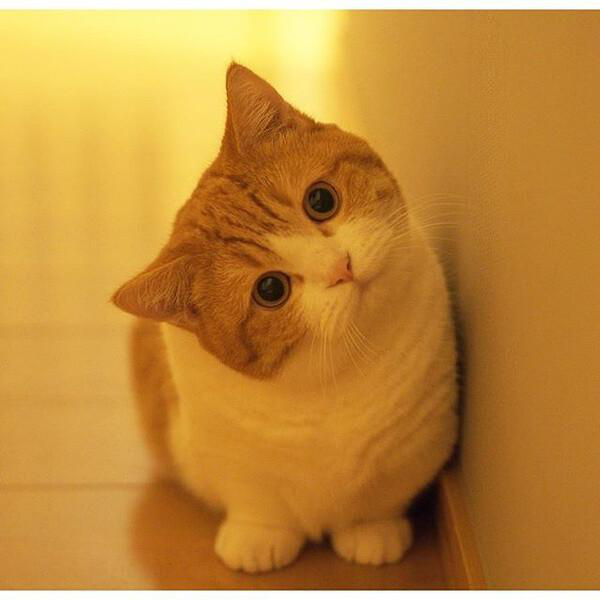

In [154]:
Image.fromarray(X.reshape(600,600,-1))

In [ ]:
from numpy import matrix, linalg
C = matrix([[2,4,0],[1,3,0],[0,0,0],[0,0,0]])
U, SIG, VT = linalg.svd(C)

$$\begin{bmatrix}x&y\\ z&w_x\\\end{bmatrix}\begin{bmatrix}x&y\\ z&w_x\\\end{bmatrix}$$

{{np.matrix([[1,2],[3,4]])}}{{np.matrix([[1,2],[3,4]])}}